In [2]:
from micrograd import nn

In [3]:
class MLP(nn.Net):
    def __init__(self):
        self.layer1 = nn.Linear(3, 4)
        self.layer2 = nn.Linear(4, 4)
        self.layer3 = nn.Linear(4, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [4]:
# The next cells were take from Karpathy's tutorial on micrograd.

In [5]:
x = [2.0, 3.0, -1.0]
n = MLP()
n(x)

val=-0.7874139957103782

In [6]:
print(len(n.parameters()))

41


In [7]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs]
ypred

[val=-0.7874139957103782,
 val=-0.9341374820239162,
 val=-0.699222700944738,
 val=-0.8509027452132638]

In [8]:
iterations = 100
lr = 0.01

In [9]:
loss_array = []

In [10]:
for iteration in range(iterations):
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # A bit awkward zero grading, but for now it is ok.
    for p in n.parameters():
        p.grad = 0

    loss.backward()

    # update weights
    for p in n.parameters():
        p.data -= lr * p.grad

    loss_array.append(loss.data)

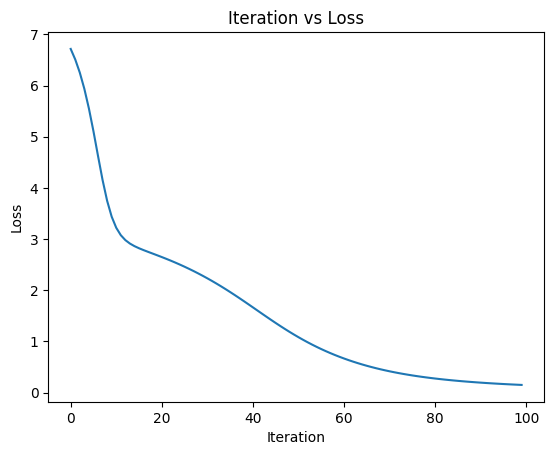

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(len(loss_array)), loss_array)

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Iteration vs Loss')

# Display the plot
plt.show()